In [1]:
#playing around with the t test/distribution

#importing functions
import random
import numpy as np

from scipy import stats

import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

np.random.seed(1)


In [2]:
#investigating the t and z distributions

#start with a population (assumed to be normal) with mean = 10, sd = 2

np.random.seed(1)

pop_mean = 10
pop_sd = 2
n = 2

samples = 10000

#define a function which takes an input of the population paramaters and sample size and retruns t and z distributions
def t_dist(mu,sd,n):
    pop_mean = mu
    pop_sd = sd  

    sample = np.random.normal(pop_mean,pop_sd,n)
    #calculate mean and corrected sample variance
    sample_mean = np.mean(sample)
    #cor_sample_var = 1/(len(sample)-1)*sum((sample - sample_mean)**2)
    sample_sd = np.sqrt(np.var(sample, ddof = 1))

    #calculate Z "value (depending on population)"" for the sample
    # Z is a random variable depending on the population parameters
    Z = (sample_mean - pop_mean)/(pop_sd/np.sqrt(n))

    T = (sample_mean - pop_mean)/(sample_sd/np.sqrt(n))

    return (T,Z)


test = t_dist(pop_mean,pop_sd,n)
T = [t_dist(pop_mean,pop_sd,n)[0] for i in range(samples)]
Z = [t_dist(pop_mean,pop_sd,n)[1] for i in range(samples)]


len(Z)

10000

10000
10000


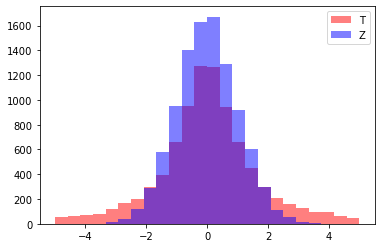

In [3]:
#plotting T and Z score arrays
fig, ax = plt.subplots()
#ax.scatter([1 for i in X1],X1)
#ax.scatter([2 for i in X2],X2)
print(len(Z))
print(len(T))

num_bins = 25
breaks = np.linspace(-5,5,num_bins)
ax.hist(T, bins = breaks, color = "red", alpha = 0.5, label = "T")
ax.hist(Z, bins = breaks, color =  "blue", alpha = 0.5, label = "Z")
ax.legend(loc = "upper right")



In [ ]:
#Comparing 2 samples (ttest)
# 2 independent 2 sample t test

#set random seed
np.random.seed(1)

#generate first sample
X1 = np.random.normal(0,1,10)
X2 = np.random.normal(1,1,10)




###run a t-test on the sample
##ttest_ind = independent samples
p = stats.ttest_ind(X1,X2, equal_var = True)
print(p)

##manual t-distribution
#sample mean:
Xn = 1/len(X1) * sum(X1)
#bessel-corrected sample variance
Sv = 1/(len(X1)-1) * sum( (X1 - Xn) ** 2)

#calculating Z rv (will have standnormal distribution)
Z = Xn - 





#df = pd.DataFrame(np.array([X1,X2]), columns = ["X1","X2"])
#df = pd.DataFrame({"X1" : X1, "X2" : X2})

df = pd.DataFrame({"X" : np.repeat([0,1],[len(X1),len(X2)]), #X is arbitrary
                   "Y" : np.concatenate((X1,X2),axis = 0)}) 

                  
fig, ax = plt.subplots()
#ax.scatter([1 for i in X1],X1)
#ax.scatter([2 for i in X2],X2)

ax.scatter(df.X,df.Y, c = df.X)

In [ ]:
#approximating gauss using montecarlo
# as you do more random shifts the variability increases and hence the sd increases = wow

import numpy.random as rd
import matplotlib.pyplot as plt

def norm():
    a = 0
    for i in range(1000):
        #random number between -1 and 1
        a += rd.uniform(-1,1)
    return a

#degrees of freedom aka sources of variability (im not sure if this is the right term)
x = []

for i in range(1000):
    x.append(norm())

print(x)
num_bins = 20

n, bins, patches = plt.hist(x, num_bins,)
plt.show()
